In [1]:
from sklearn.cluster import KMeans
import os
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import warnings
from sklearn.metrics import silhouette_score
warnings.filterwarnings('ignore')
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [2]:
directory = './intensOcupation'

mySeries = []
namesofMySeries = []
counter=0
for filename in os.listdir(directory):

    if filename.endswith(".csv") :
        df = pd.read_csv(directory+"/"+filename)
        df = df.loc[:,["ocupacion"]]
        # While we are at it I just filtered the columns that we will be working on

        # ,set the date columns as index
        # and lastly, ordered the data according to our date index
        df.columns = range(df.shape[1])
        dim=len(df.to_numpy())

        mySeries.append(list(df.to_numpy().reshape(dim)[:148]))


        df = pd.read_csv(directory+"/"+filename)




        namesofMySeries.append(filename)
        namesofMySeries.append(filename)
        counter+=1

#mySeries=np.array(mySeries,dtype=object)



In [16]:
k=4

kmeans = KMeans(n_clusters=k, random_state=42)
y_pred = kmeans.fit(mySeries).predict(mySeries)
print(y_pred)
kmeans.cluster_centers_


[2 1 0 1 2 0 2 2 3 0 3 1 1 1 2 3 1 3 1 0 1 3 1 0 3 0 2 1 3 0 0 1 0 1 3 1 0
 1 3 1 3 1 3 0 3 3 0 0 3 3 1 3 1 1 1 3 2 0 1 0 3 3 1 1 0 3 0 1 2 3 2 2 2 2
 3 3 0 2 1 3 3 3 3 3 1 3 0 1 3 3 3 0 3 2 3 0 3 3 3 1 3 2 0 0 3 3 0 3 1 2 1
 1 0 0 3 1 2 3 1 1 0 1 3 0 3 0 3 1 3 3 0 0 1 1 0 1 3 3 0 0 0 2 1 3 1 0 0 1
 1 3 2 3 3 3 3 3 3 2 1 1 3 1 1 1 0 3 2 1 1 2 3 3 1 0 2 3 3 0 1 0 2 3 1 2 1
 0 3 3 3 1 1 1 2 0 1 0 3 3 1 2 3 3 0 3 3 1 2 0 1 3 3 1 0 1 3 0 3 1 0 3 0 1
 1 1 3 3 1 3 3 3 3 1 2 2 1 0 1 3 1 3 1 3 1 3 3 1 3 3 1 1 3 3 0 3 1 3 1 0 1
 3 3 3 3 3 1 0 2 3 3 1 2 1 3 2 0 2 2 0 3 1 2 1 3 1 1 3 0 1 1 1 3 2 0 1 3 2
 1 3 3 1 3 1 3 2 0 1 2 3 2 2 3 3 0 1 1 1 0 0 1 1 2 1 0 3 3 2 3 1 3 2 2 1 2
 3 3 3 3 2 1 3 0 0 1 0 3 1 1 1 2 1 1 1 0 0 3 1 3 0 2 0 0 0 3 0 3 0 0 1 2 1
 2 3 0 2 1 3 0 2 2 2 2 1 0 1 0 3 0 3 3 1 3 3 1 3 1 1 3 3 1 0 3 0 0 0 1 0 1
 1 3 1 1 3 1 1 0 0 3 3 0 1 0 1 1 0 1 0 0 1 3 0 3 3 1 0 0 3 1 0 1 2 3 1 3 3
 0 1 3 3 0 0 1 0 2 0 0 2 3 0 1 3 2 1 0 1 1 1 3 1 3 1 1 3 0 1 3 1 1 0 3 2 1
 0 1 1 2 2 0 0 1 1 3 3 3 

array([[ 1.00390536,  0.82237293,  0.78549466,  0.73473004,  0.70708366,
         0.63966404,  0.59280388,  0.55580139,  0.54283601,  0.45873456,
         0.44797508,  0.38573994,  0.34854496,  0.34899539,  0.34923585,
         0.32130332,  0.31115346,  0.28435957,  0.25138961,  0.22760519,
         0.22756522,  0.21038834,  0.21760733,  0.1902927 ,  0.18909893,
         0.16003407,  0.17720476,  0.17285728,  0.16214071,  0.14896567,
         0.16124943,  0.14960836,  0.17126964,  0.16250604,  0.13215979,
         0.12777883,  0.1331435 ,  0.12363641,  0.12944267,  0.12960649,
         0.12146602,  0.13178117,  0.136672  ,  0.11884359,  0.16459156,
         0.15426848,  0.15422364,  0.14573069,  0.13291634,  0.12262538,
         0.13820409,  0.14385078,  0.13703374,  0.15727448,  0.16201204,
         0.16076876,  0.17571843,  0.17647984,  0.1897349 ,  0.18529261,
         0.21314054,  0.22309649,  0.23644542,  0.28089676,  0.32093104,
         0.33805827,  0.43339353,  0.48976721,  0.5

In [21]:
def plot_data():
    for m in mySeries:
        plt.plot(m, color='r',)


def plot_centroids():
    fig, axs = plt.subplots(4,1,figsize=(25,25))



    for m in range(len(mySeries)):
        axs[y_pred[m]].plot(mySeries[m],color='r')
    for m in range(len(kmeans.cluster_centers_)):
        axs[m].plot(kmeans.cluster_centers_[m], color='b',linewidth=3)



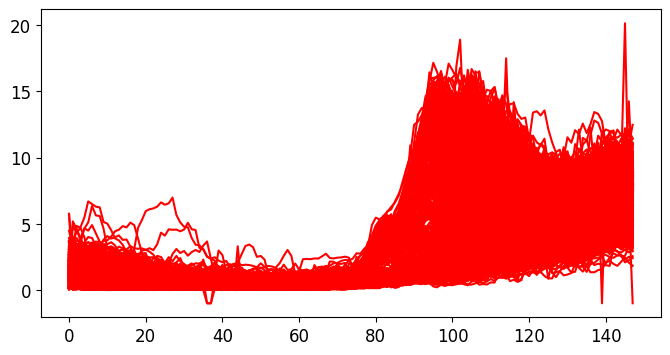

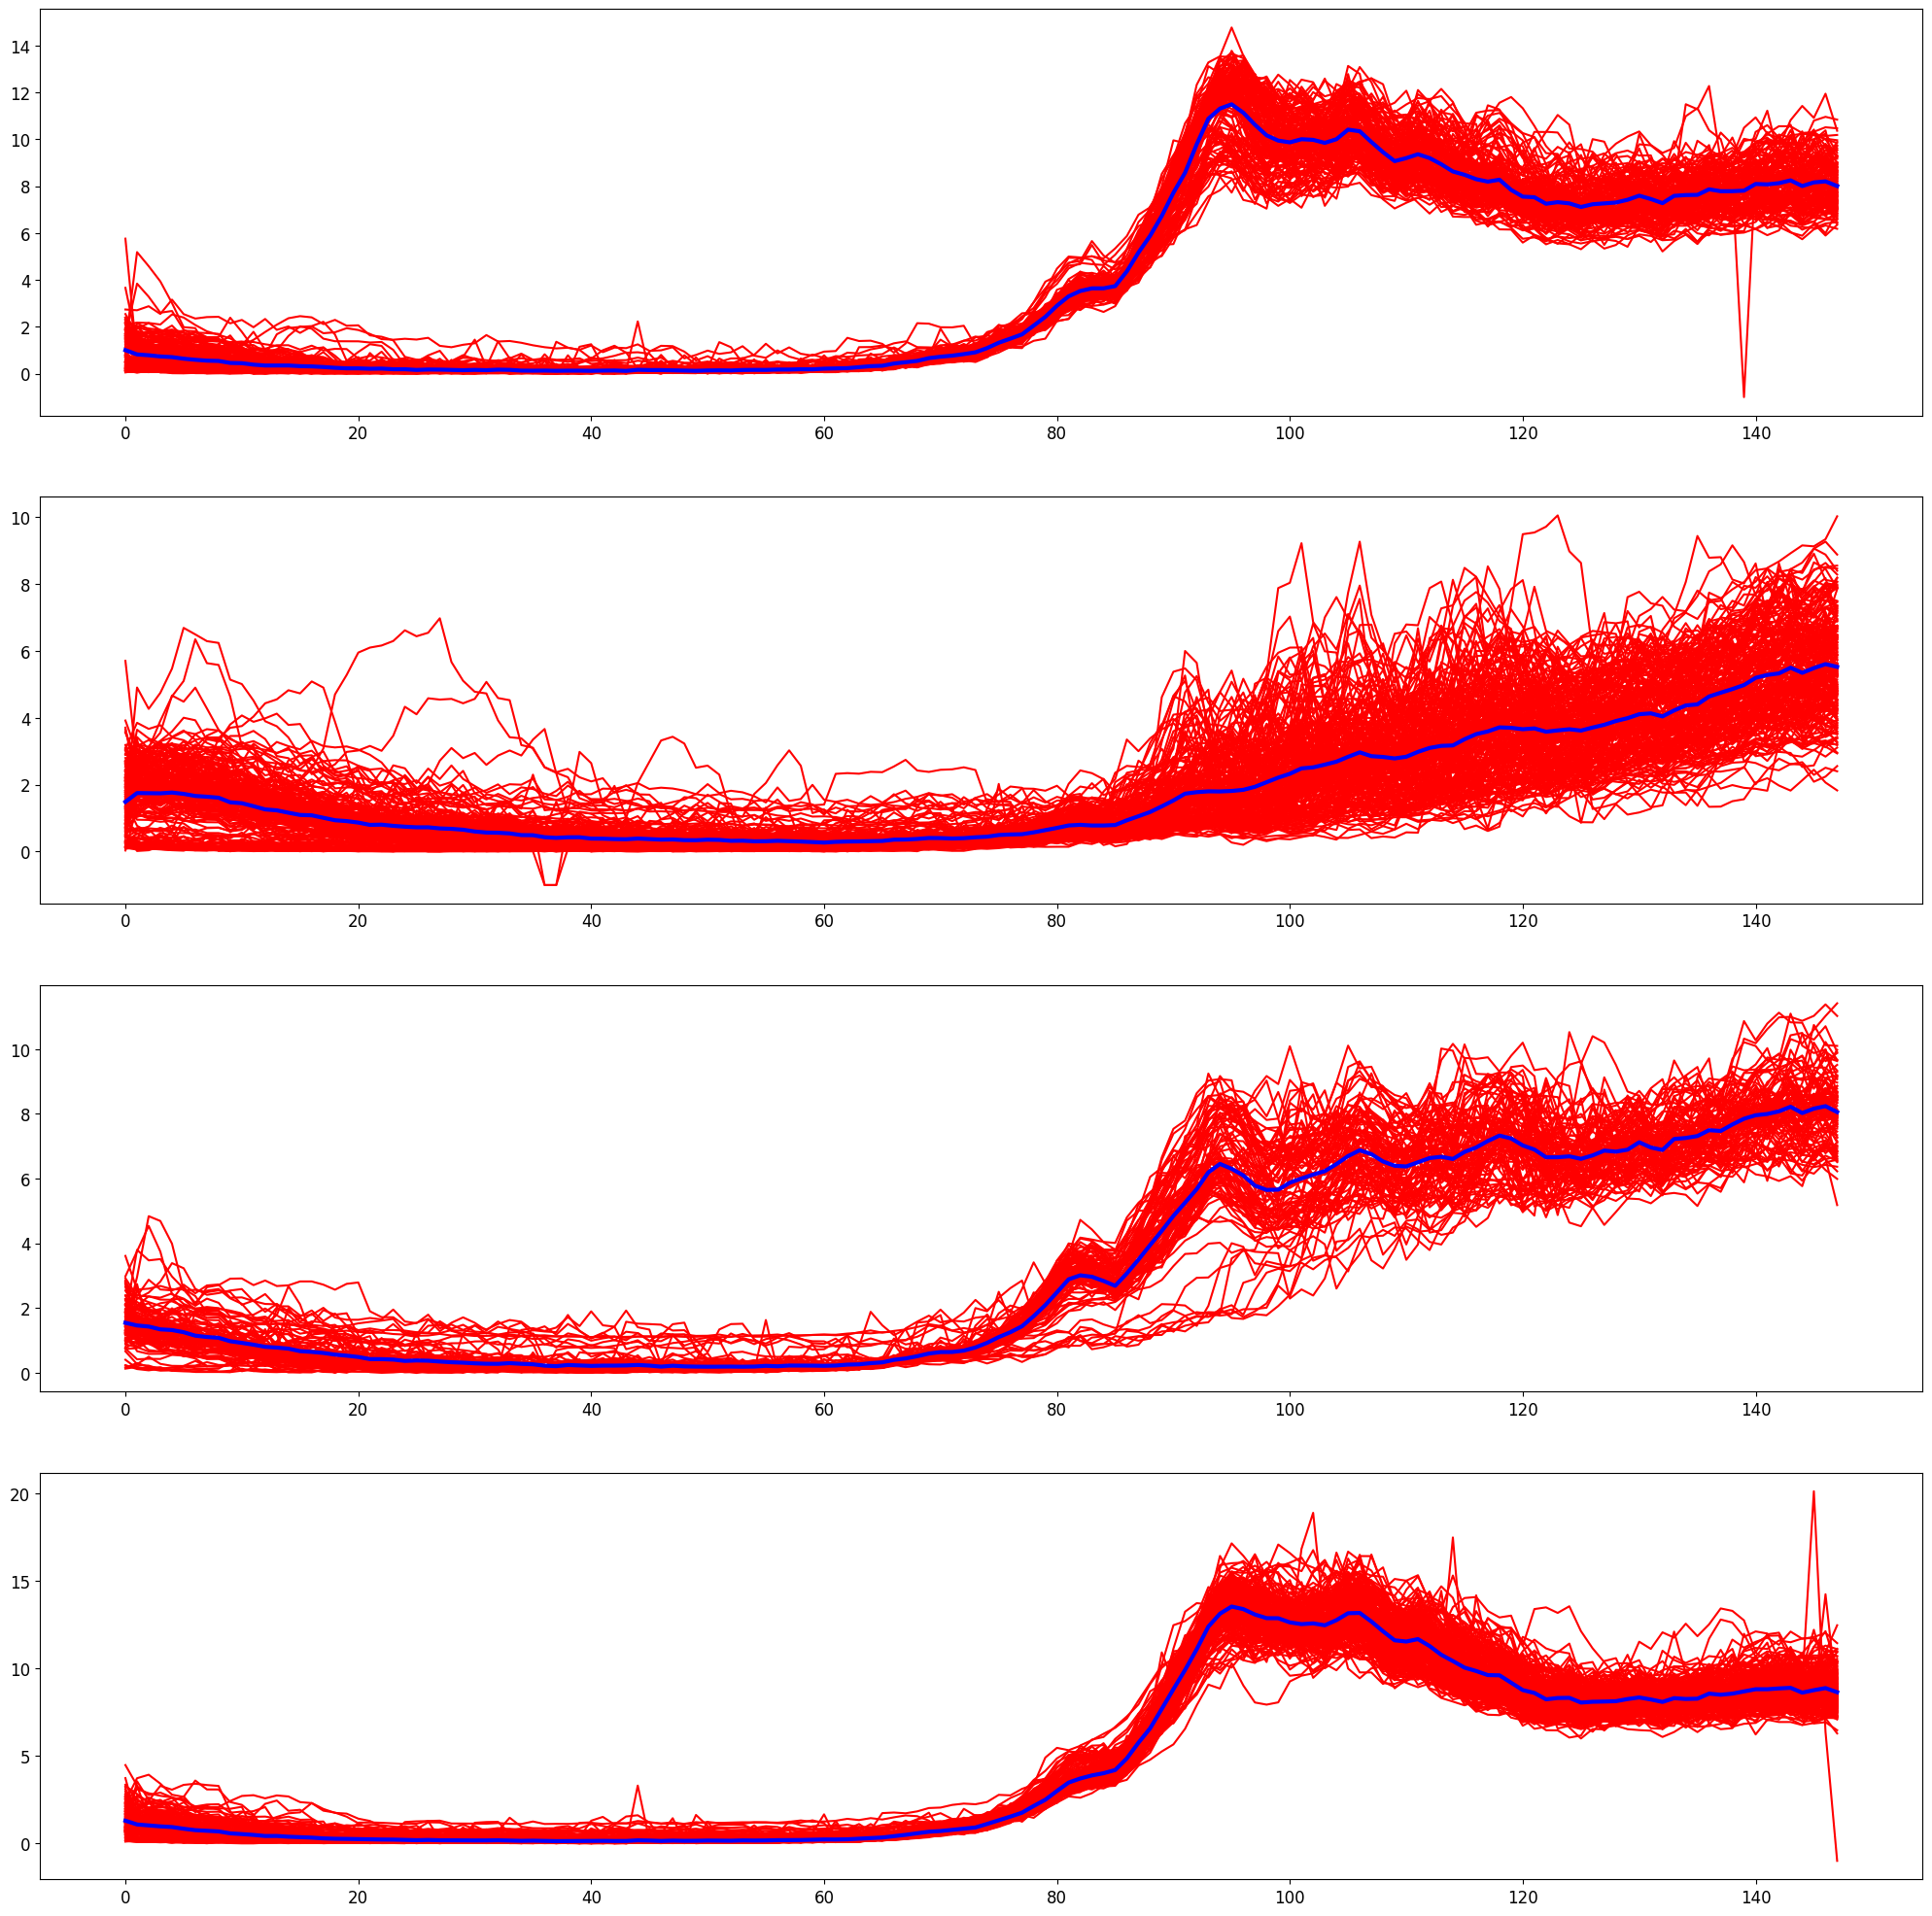

In [22]:
plt.figure(figsize=(8, 4))
plot_data()
plot_centroids()
#plot_decision_boundaries(kmeans, X)
#save_fig("voronoi_plot")
plt.show()


In [13]:
directory = './NormalIntenOcu'
containsNan=[]
for filename in os.listdir(directory):
    lines=open(directory+"/"+filename)
    for l in lines:
        if 'NaN' in l:
            containsNan.append(filename)
            pass
print(set(containsNan))

{'evolucion_diaria_intensidad.2022.09.27.csv', 'evolucion_diaria_intensidad.2021.01.25.csv', 'evolucion_diaria_intensidad.2021.02.21.csv', 'evolucion_diaria_intensidad.2022.08.23.csv', 'evolucion_diaria_intensidad.2022.10.03.csv', 'evolucion_diaria_intensidad.2021.01.17.csv', 'evolucion_diaria_intensidad.2021.04.19.csv', 'evolucion_diaria_intensidad.2022.10.02.csv', 'evolucion_diaria_intensidad.2021.10.31.csv', 'evolucion_diaria_intensidad.2021.01.16.csv', 'evolucion_diaria_intensidad.2022.10.30.csv', 'evolucion_diaria_intensidad.2021.02.11.csv', 'evolucion_diaria_intensidad.2022.09.28.csv', 'evolucion_diaria_intensidad.2021.01.26.csv', 'evolucion_diaria_intensidad.2021.03.28.csv', 'evolucion_diaria_intensidad.2022.09.30.csv', 'evolucion_diaria_intensidad.2021.01.24.csv', 'evolucion_diaria_intensidad.2022.03.27.csv', 'evolucion_diaria_intensidad.2022.09.29.csv', 'evolucion_diaria_intensidad.2022.10.01.csv'}


In [14]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(mySeries)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]
print(inertias)

[448917.0697201018, 111302.13585305482, 73065.54646411518, 60679.004382996856, 51249.92244339644, 46956.70198739188, 44245.959733621305, 41969.93716880025, 39974.19682175467]


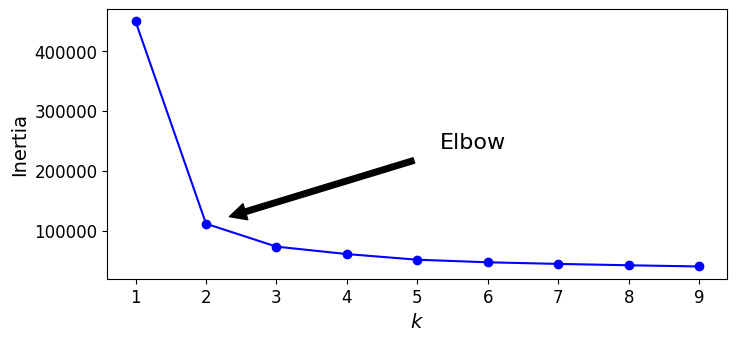

[KMeans(n_clusters=1, random_state=42), KMeans(n_clusters=2, random_state=42), KMeans(n_clusters=3, random_state=42), KMeans(n_clusters=4, random_state=42), KMeans(n_clusters=5, random_state=42), KMeans(n_clusters=6, random_state=42), KMeans(n_clusters=7, random_state=42), KMeans(random_state=42), KMeans(n_clusters=9, random_state=42)]


In [15]:
plt.figure(figsize=(8, 3.5))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(2, inertias[1]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
#plt.axis([1, 8.5, 0, 1300])
plt.show()
print(kmeans_per_k)

[0.6237212925520337, 0.4815121729799047, 0.3632467542903491, 0.29703440070219245, 0.2788737411984749, 0.24131736358933706, 0.22866697275805964, 0.19007950962115394]


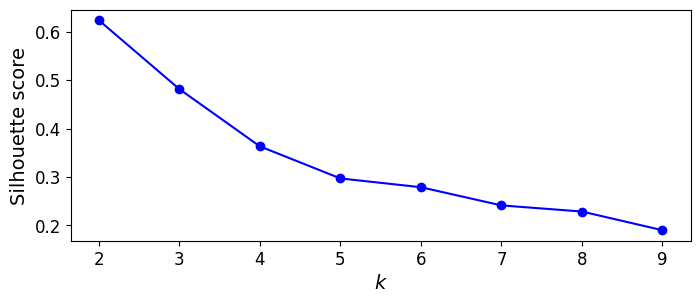

In [16]:
silhouette_scores = [silhouette_score(mySeries, model.labels_)
                     for model in kmeans_per_k[1:]]
plt.figure(figsize=(8, 3))
plt.plot(range(2, 10), silhouette_scores, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Silhouette score", fontsize=14)
#plt.axis([1.8, 8.5, 0.55, 0.7])
plt.show()


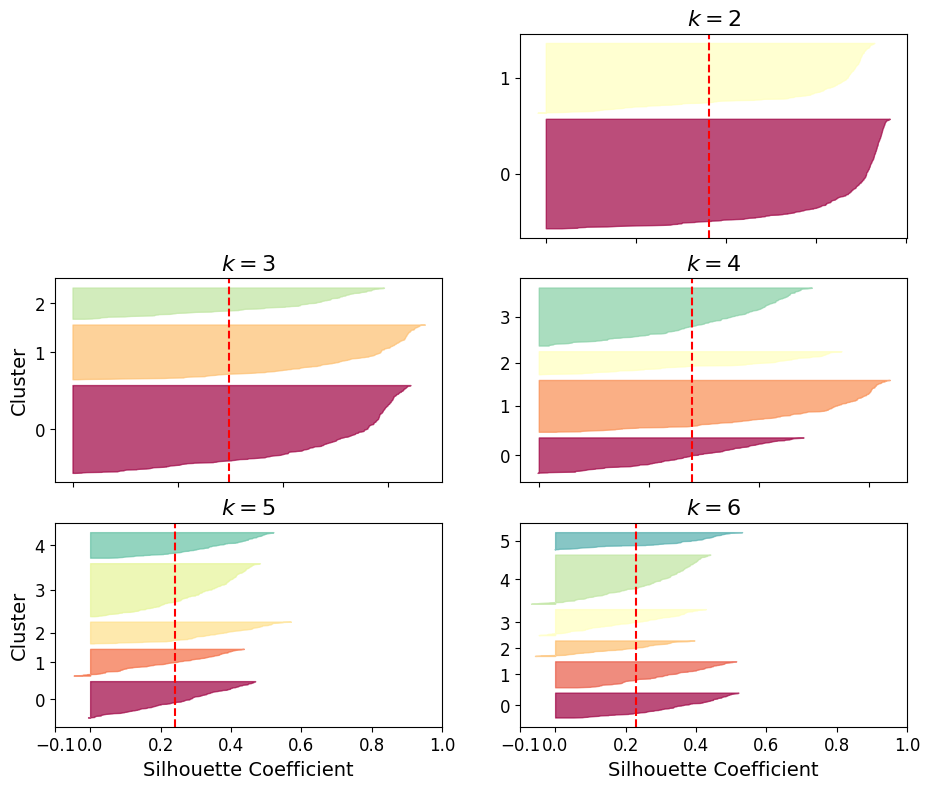

In [39]:
from sklearn.metrics import silhouette_samples
from matplotlib.ticker import FixedLocator, FixedFormatter

plt.figure(figsize=(11, 9))

for k in (2,3, 4,5,6):
    plt.subplot(3, 2, k )
    
    y_pred = kmeans_per_k[k - 1].labels_
    silhouette_coefficients = silhouette_samples(mySeries, y_pred)

    padding = len(mySeries) // 30
    pos = padding
    ticks = []
    for i in range(k):
        coeffs = silhouette_coefficients[y_pred == i]
        coeffs.sort()

        color = mpl.cm.Spectral(i / k)
        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
                          facecolor=color, edgecolor=color, alpha=0.7)
        ticks.append(pos + len(coeffs) // 2)
        pos += len(coeffs) + padding

    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
    if k in (3, 5):
        plt.ylabel("Cluster")
    
    if k in (5, 6):
        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
        plt.xlabel("Silhouette Coefficient")
    else:
        plt.tick_params(labelbottom=False)

    plt.axvline(x=silhouette_scores[k], color="red", linestyle="--")
    plt.title("$k={}$".format(k), fontsize=16)

plt.show()

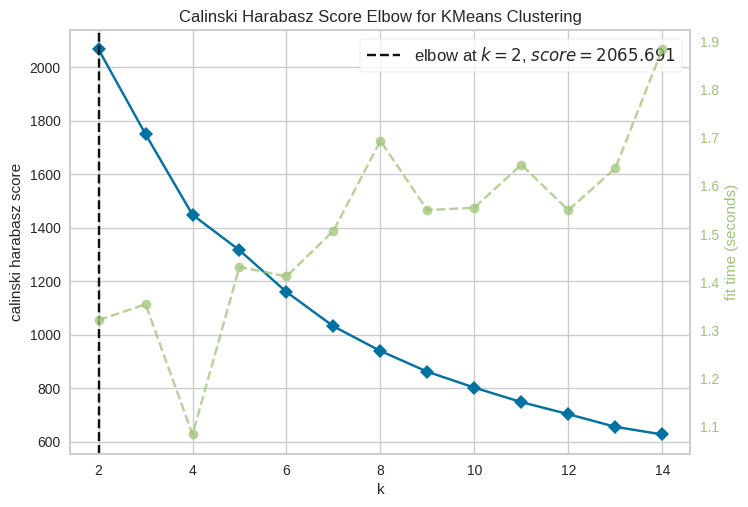

<AxesSubplot: title={'center': 'Calinski Harabasz Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='calinski harabasz score'>

In [28]:
# Calinski Harabasz Score for K means
# Import ElbowVisualizer
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
# k is range of number of clusters.
visualizer = KElbowVisualizer(model, k=(2,15),metric='calinski_harabasz', timings= True)
visualizer.fit(mySeries)        # Fit the data to the visualizer
visualizer.show()        # Finalize and render the figure

Interpolation

20


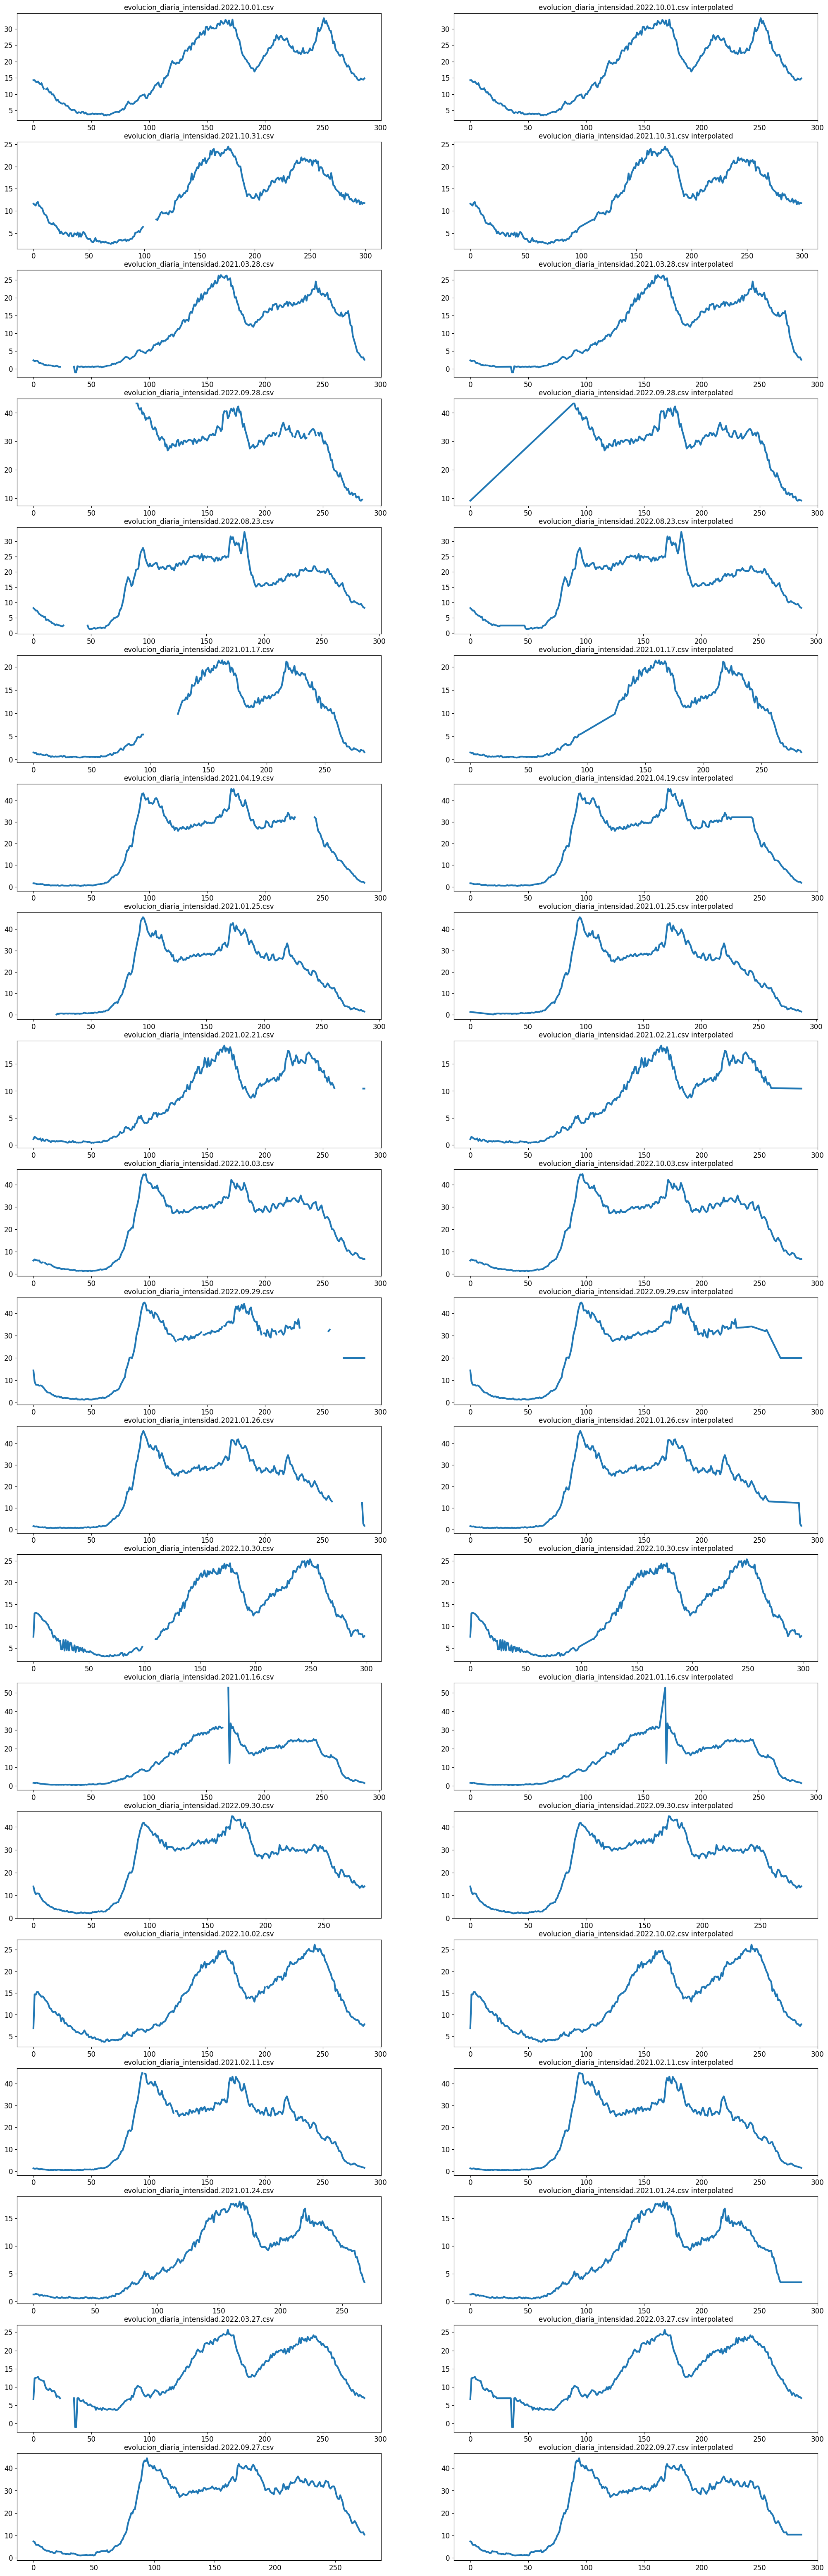

In [33]:
contiansNan=list(set(containsNan))

directory = './NormalIntenOcu'
lista=['evolucion_diaria_intensidad.2021.02.11.csv', 'evolucion_diaria_intensidad.2022.09.27.csv', 'evolucion_diaria_intensidad.2021.01.26.csv', 'evolucion_diaria_intensidad.2021.01.16.csv', 'evolucion_diaria_intensidad.2022.03.27.csv', 'evolucion_diaria_intensidad.2022.08.23.csv', 'evolucion_diaria_intensidad.2021.04.19.csv', 'evolucion_diaria_intensidad.2022.10.02.csv', 'evolucion_diaria_intensidad.2021.01.25.csv', 'evolucion_diaria_intensidad.2021.01.17.csv', 'evolucion_diaria_intensidad.2022.10.03.csv', 'evolucion_diaria_intensidad.2022.10.30.csv', 'evolucion_diaria_intensidad.2022.09.30.csv', 'evolucion_diaria_intensidad.2021.10.31.csv', 'evolucion_diaria_intensidad.2021.01.24.csv', 'evolucion_diaria_intensidad.2021.02.21.csv', 'evolucion_diaria_intensidad.2021.03.28.csv', 'evolucion_diaria_intensidad.2022.10.01.csv', 'evolucion_diaria_intensidad.2022.09.28.csv', 'evolucion_diaria_intensidad.2022.09.29.csv']
fig, axs = plt.subplots(20,2,figsize=(25,80))

print(len(contiansNan))
for i in range(len(contiansNan)):


    df = pd.read_csv(directory+"/"+contiansNan[i])
    df = df.loc[:,["intensidad"]]
    newdf=df.interpolate(method='linear')



    axs[i, 0].plot(df,linewidth=3)
    axs[i, 1].plot(newdf,linewidth=3)
    

    axs[i, 0].set_title(contiansNan[i])
    axs[i, 1].set_title(contiansNan[i]+' interpolated')




plt.show()


In [74]:
for i in range(len(lista)):
    print(lista[i])
    
    df = pd.read_csv(directory+"/"+lista[i])
    df = df.loc[:,["intensidad"]]
    newdfIn=df.interpolate(method='linear')
    df = pd.read_csv(directory+"/"+lista[i])

    df = df.loc[:,["ocupacion"]]
    newdfOc=df.interpolate(method='linear')
  
    file=open(directory+"/"+lista[i],'w+')
    
    newdfIn.to_csv("archivo1.csv", index=False)
    newdfOc.to_csv("archivo2.csv", index=False)
    fileInten=open('archivo1.csv','r').readlines()
    fileOc=open('archivo2.csv','r').readlines()
    for j in range(len(fileInten)):
        if fileInten[j].strip():
            valueIn=fileInten[j].split(' ')
            valueOc=fileOc[j].split(' ')

            file.write(valueIn[0].strip()+','+valueOc[0].strip()+'\n')
            print(valueIn[0].strip()+','+valueOc[0].strip())
   
    file.close()
    os.remove('archivo1.csv')
    os.remove('archivo2.csv')
    
    


    

    



evolucion_diaria_intensidad.2021.02.11.csv
intensidad,ocupacion
1.333333,0.1545894
1.119048,0.1333333
1.157143,0.08095238
1.290476,0.07619048
1.090476,0.04285714
0.9,0.04285714
0.9238095,0.04285714
0.9857143,0.04285714
0.8619047,0.05714286
0.8,0.02857143
0.7761905,0.1571429
0.6809524,0.02857143
0.6428571,0.04285714
0.547619,0.07142857
0.4714286,0.02857143
0.6285715,0.03333334
0.5619048,0.04285714
0.5142857,0.03333334
0.6714286,0.02857143
0.6238095,0.01904762
0.4761905,0.02380952
0.7571428,0.05238095
0.6761905,0.02857143
0.6523809,0.02857143
0.5333334,0.01428571
0.547619,0.01428571
0.4428571,0.02380952
0.5380952,0.1142857
0.5666667,0.04285714
0.5190476,0.01904762
0.5666667,0.00952381
0.4761905,0.02380952
0.6714286,0.0952381
0.5333334,0.1285714
0.4714286,0.03809524
0.4761905,0.08095238
0.4380952,0.01904762
0.4619048,0.02380952
0.6476191,0.7857143
0.5571429,0.2
0.552381,0.0952381
0.5714286,0.01428571
0.4285714,0.00952381
0.6,0.01904762
0.8285714,0.09047619
0.7857143,0.2809524
0.7857143,0.

Last Observation Carried Forward (LOCF)

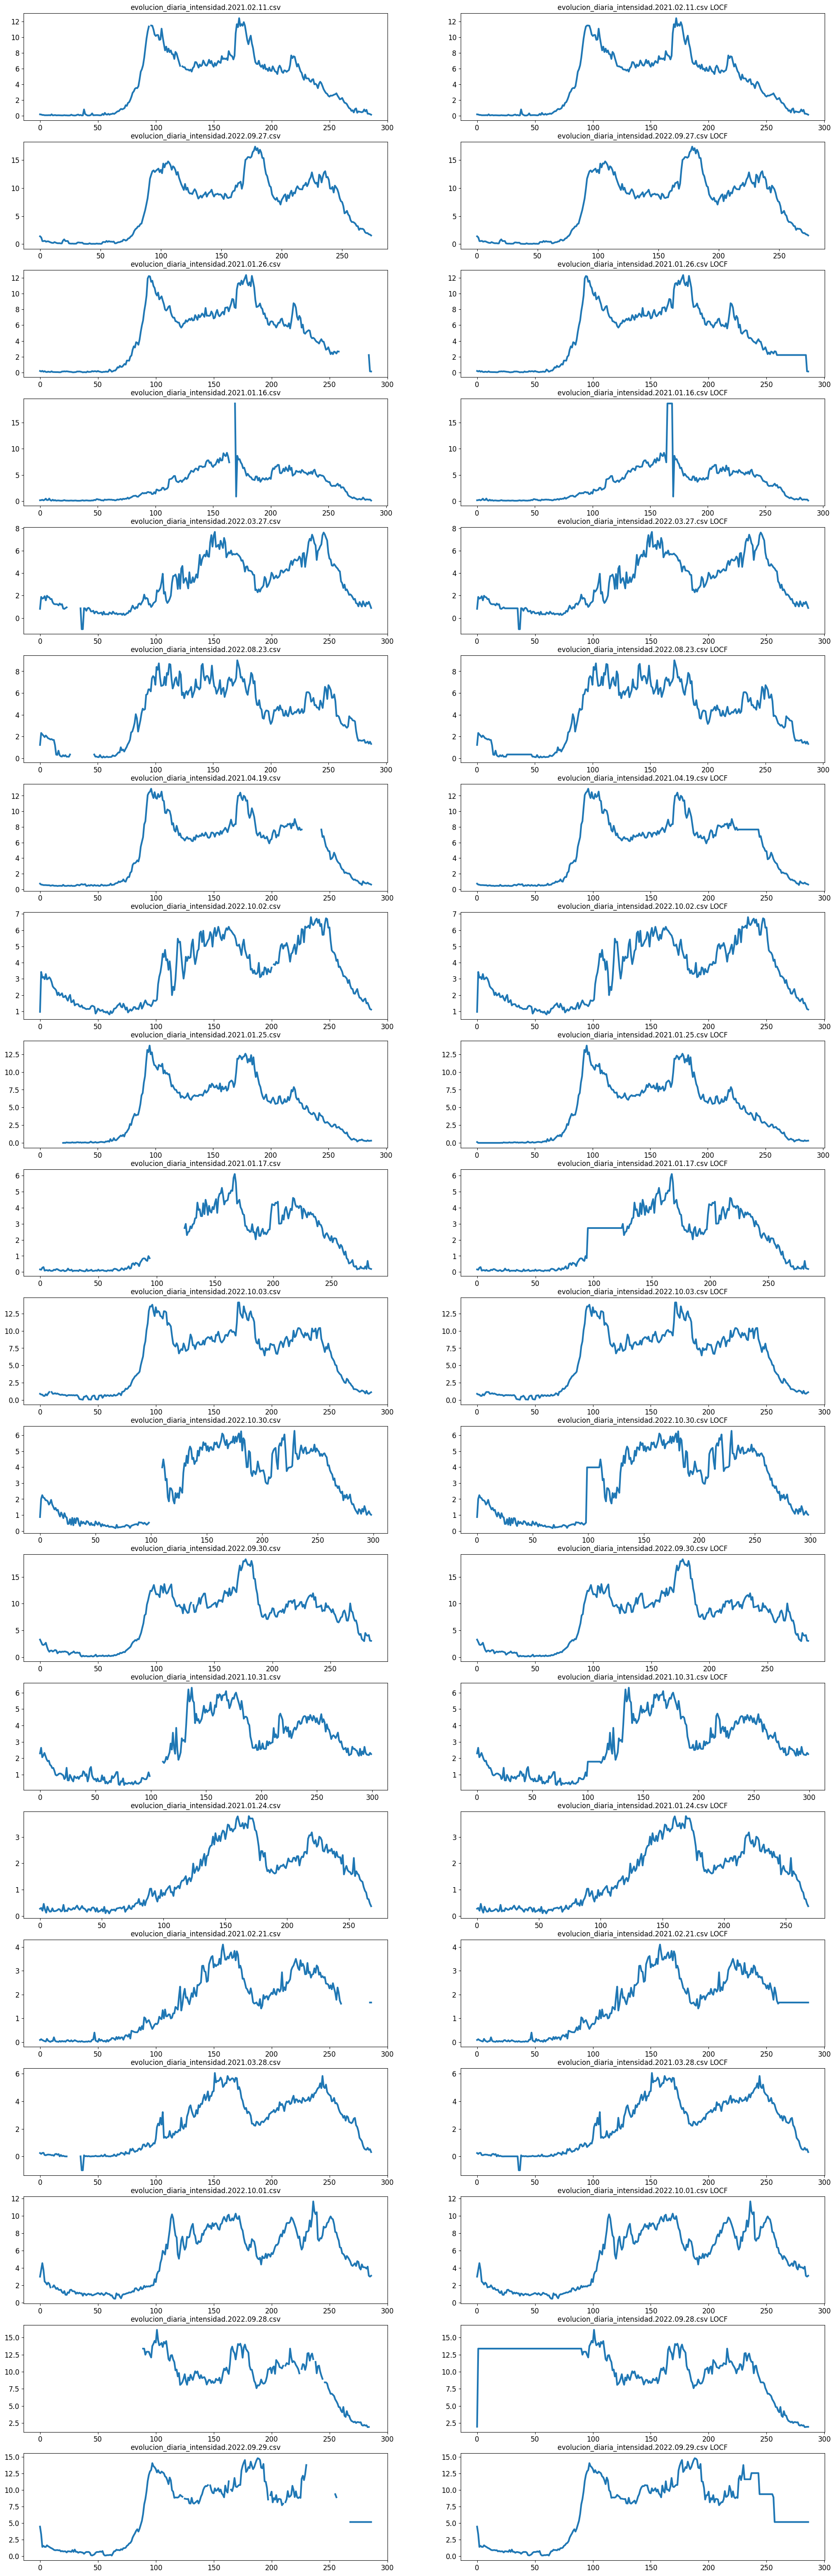

In [7]:
directory = './intensOcupation'
lista=['evolucion_diaria_intensidad.2021.02.11.csv', 'evolucion_diaria_intensidad.2022.09.27.csv', 'evolucion_diaria_intensidad.2021.01.26.csv', 'evolucion_diaria_intensidad.2021.01.16.csv', 'evolucion_diaria_intensidad.2022.03.27.csv', 'evolucion_diaria_intensidad.2022.08.23.csv', 'evolucion_diaria_intensidad.2021.04.19.csv', 'evolucion_diaria_intensidad.2022.10.02.csv', 'evolucion_diaria_intensidad.2021.01.25.csv', 'evolucion_diaria_intensidad.2021.01.17.csv', 'evolucion_diaria_intensidad.2022.10.03.csv', 'evolucion_diaria_intensidad.2022.10.30.csv', 'evolucion_diaria_intensidad.2022.09.30.csv', 'evolucion_diaria_intensidad.2021.10.31.csv', 'evolucion_diaria_intensidad.2021.01.24.csv', 'evolucion_diaria_intensidad.2021.02.21.csv', 'evolucion_diaria_intensidad.2021.03.28.csv', 'evolucion_diaria_intensidad.2022.10.01.csv', 'evolucion_diaria_intensidad.2022.09.28.csv', 'evolucion_diaria_intensidad.2022.09.29.csv']
fig, axs = plt.subplots(20,2,figsize=(25,80))

'''
for l in lista:
    df = pd.read_csv(directory+"/"+l)
    df = df.loc[:,["intensidad"]]

plt.plot(df, color='blue')
plt.show()
'''

for i in range(len(lista)):




    df = pd.read_csv(directory+"/"+lista[i])
    df = df.loc[:,["ocupacion"]]
    newdf=df.fillna(method ='bfill')



    axs[i, 0].plot(df,linewidth=3)
    axs[i, 1].plot(newdf,linewidth=3)

    axs[i, 0].set_title(lista[i])
    axs[i, 1].set_title(lista[i]+' LOCF')




plt.show()


Median imputation

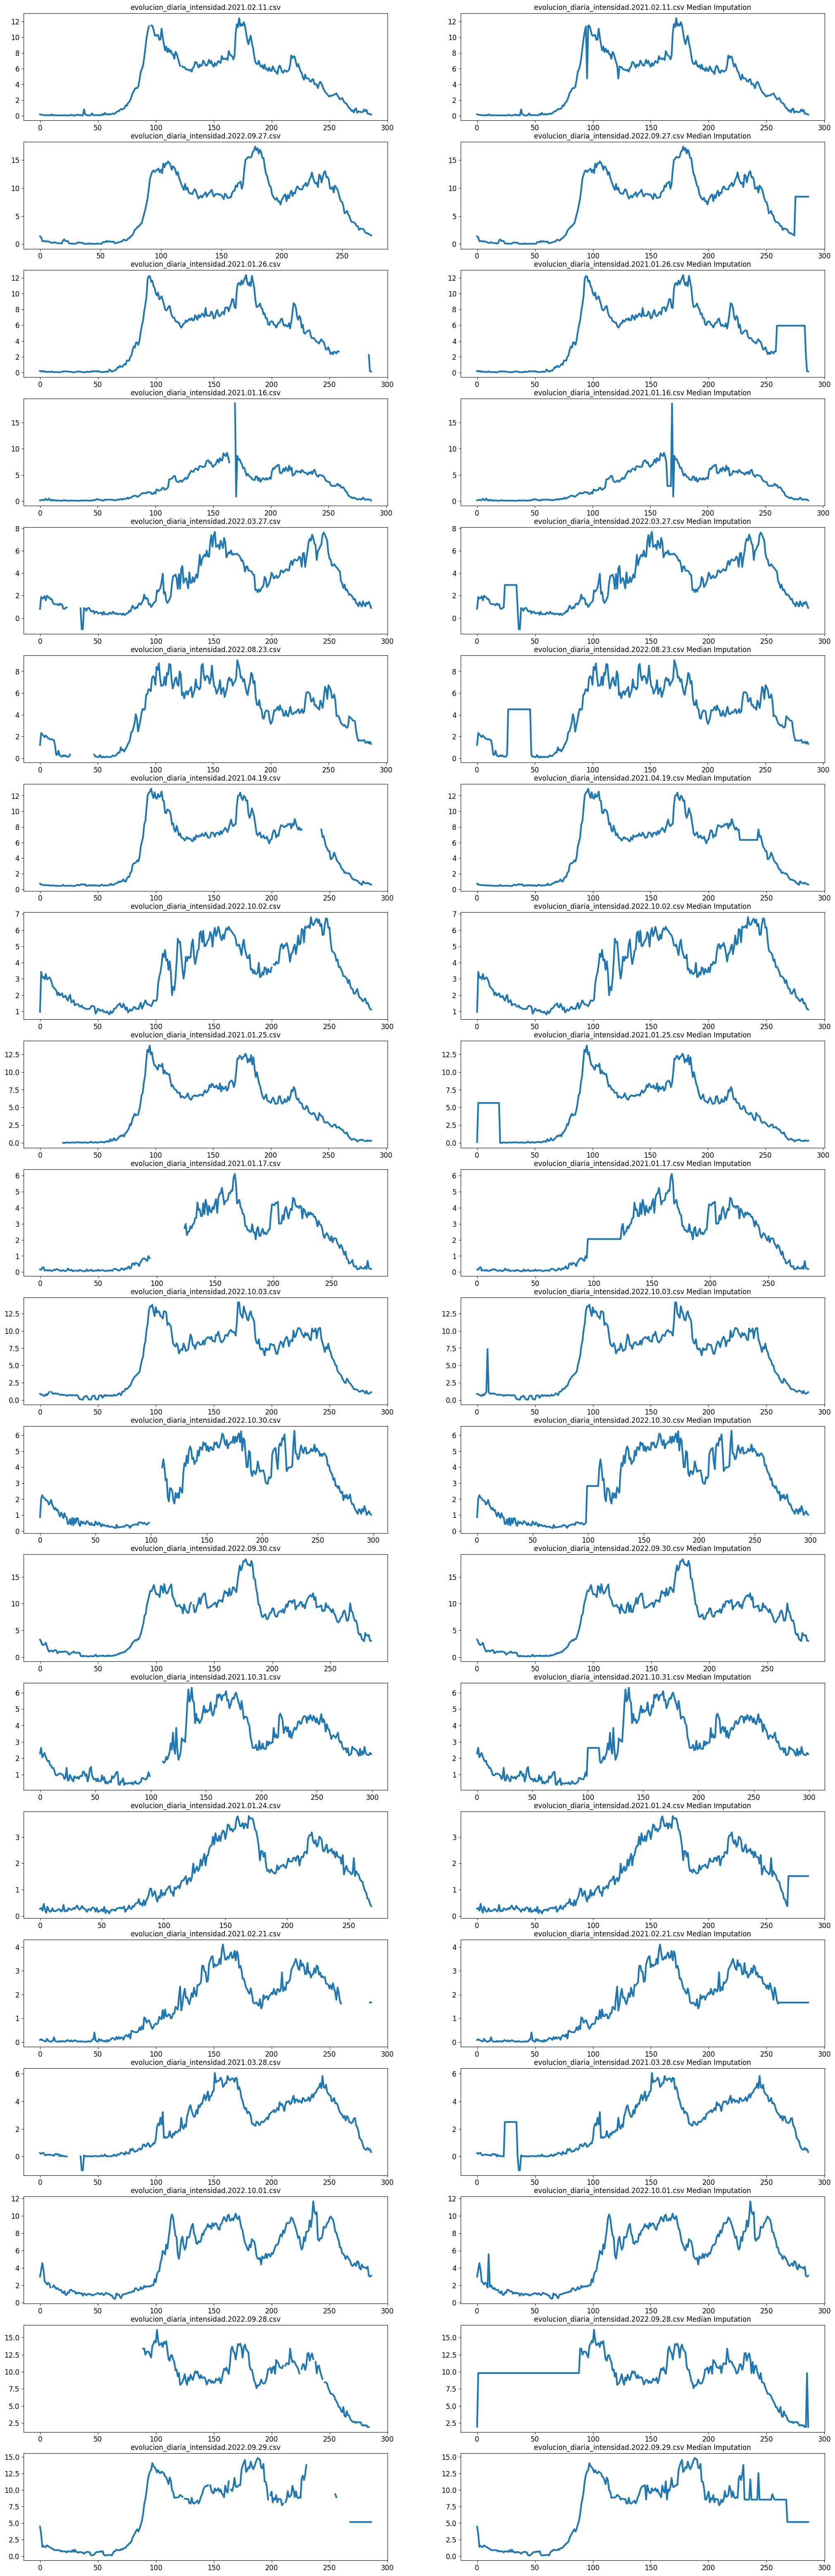

In [8]:
directory = './intensOcupation'
lista=['evolucion_diaria_intensidad.2021.02.11.csv', 'evolucion_diaria_intensidad.2022.09.27.csv', 'evolucion_diaria_intensidad.2021.01.26.csv', 'evolucion_diaria_intensidad.2021.01.16.csv', 'evolucion_diaria_intensidad.2022.03.27.csv', 'evolucion_diaria_intensidad.2022.08.23.csv', 'evolucion_diaria_intensidad.2021.04.19.csv', 'evolucion_diaria_intensidad.2022.10.02.csv', 'evolucion_diaria_intensidad.2021.01.25.csv', 'evolucion_diaria_intensidad.2021.01.17.csv', 'evolucion_diaria_intensidad.2022.10.03.csv', 'evolucion_diaria_intensidad.2022.10.30.csv', 'evolucion_diaria_intensidad.2022.09.30.csv', 'evolucion_diaria_intensidad.2021.10.31.csv', 'evolucion_diaria_intensidad.2021.01.24.csv', 'evolucion_diaria_intensidad.2021.02.21.csv', 'evolucion_diaria_intensidad.2021.03.28.csv', 'evolucion_diaria_intensidad.2022.10.01.csv', 'evolucion_diaria_intensidad.2022.09.28.csv', 'evolucion_diaria_intensidad.2022.09.29.csv']
fig, axs = plt.subplots(20,2,figsize=(25,80))

'''
for l in lista:
    df = pd.read_csv(directory+"/"+l)
    df = df.loc[:,["intensidad"]]

plt.plot(df, color='blue')
plt.show()
'''

for i in range(len(lista)):




    df = pd.read_csv(directory+"/"+lista[i])
    df = df.loc[:,["ocupacion"]]
    newdf=df.fillna(df.median())






    axs[i, 0].plot(df,linewidth=3)
    axs[i, 1].plot(newdf,linewidth=3)

    axs[i, 0].set_title(lista[i])
    axs[i, 1].set_title(lista[i]+' Median Imputation')




plt.show()


 Mean imputation

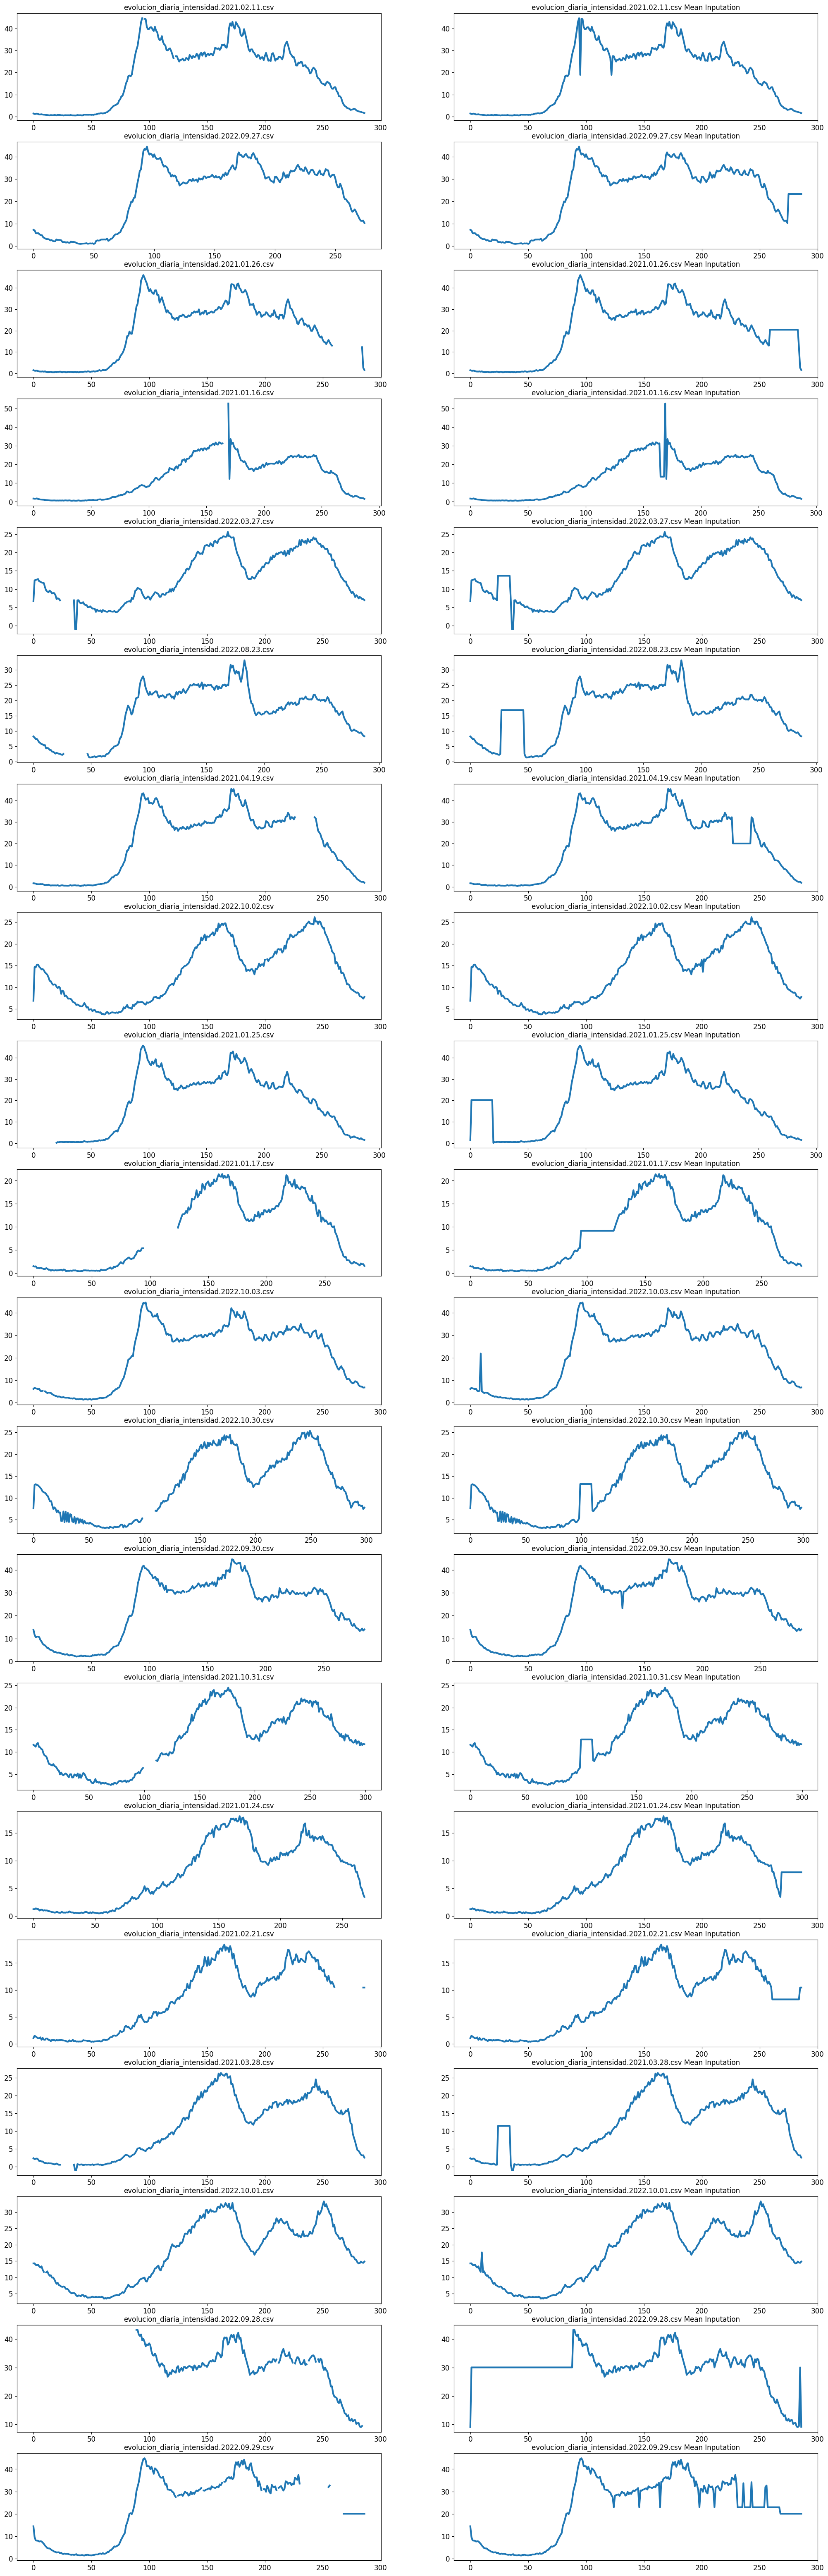

In [17]:
directory = './intensOcupation'
lista=['evolucion_diaria_intensidad.2021.02.11.csv', 'evolucion_diaria_intensidad.2022.09.27.csv', 'evolucion_diaria_intensidad.2021.01.26.csv', 'evolucion_diaria_intensidad.2021.01.16.csv', 'evolucion_diaria_intensidad.2022.03.27.csv', 'evolucion_diaria_intensidad.2022.08.23.csv', 'evolucion_diaria_intensidad.2021.04.19.csv', 'evolucion_diaria_intensidad.2022.10.02.csv', 'evolucion_diaria_intensidad.2021.01.25.csv', 'evolucion_diaria_intensidad.2021.01.17.csv', 'evolucion_diaria_intensidad.2022.10.03.csv', 'evolucion_diaria_intensidad.2022.10.30.csv', 'evolucion_diaria_intensidad.2022.09.30.csv', 'evolucion_diaria_intensidad.2021.10.31.csv', 'evolucion_diaria_intensidad.2021.01.24.csv', 'evolucion_diaria_intensidad.2021.02.21.csv', 'evolucion_diaria_intensidad.2021.03.28.csv', 'evolucion_diaria_intensidad.2022.10.01.csv', 'evolucion_diaria_intensidad.2022.09.28.csv', 'evolucion_diaria_intensidad.2022.09.29.csv']
fig, axs = plt.subplots(20,2,figsize=(25,80))



for i in range(len(lista)):




    df = pd.read_csv(directory+"/"+lista[i])
    df = df.loc[:,["intensidad  "]]
    newdf=df.fillna(df.mean())




    axs[i, 0].plot(df,linewidth=3)
    axs[i, 1].plot(newdf,linewidth=3)

    axs[i, 0].set_title(lista[i])
    axs[i, 1].set_title(lista[i]+' Mean Inputation')




plt.show()

Next Observation Carried Backward (NOCB)

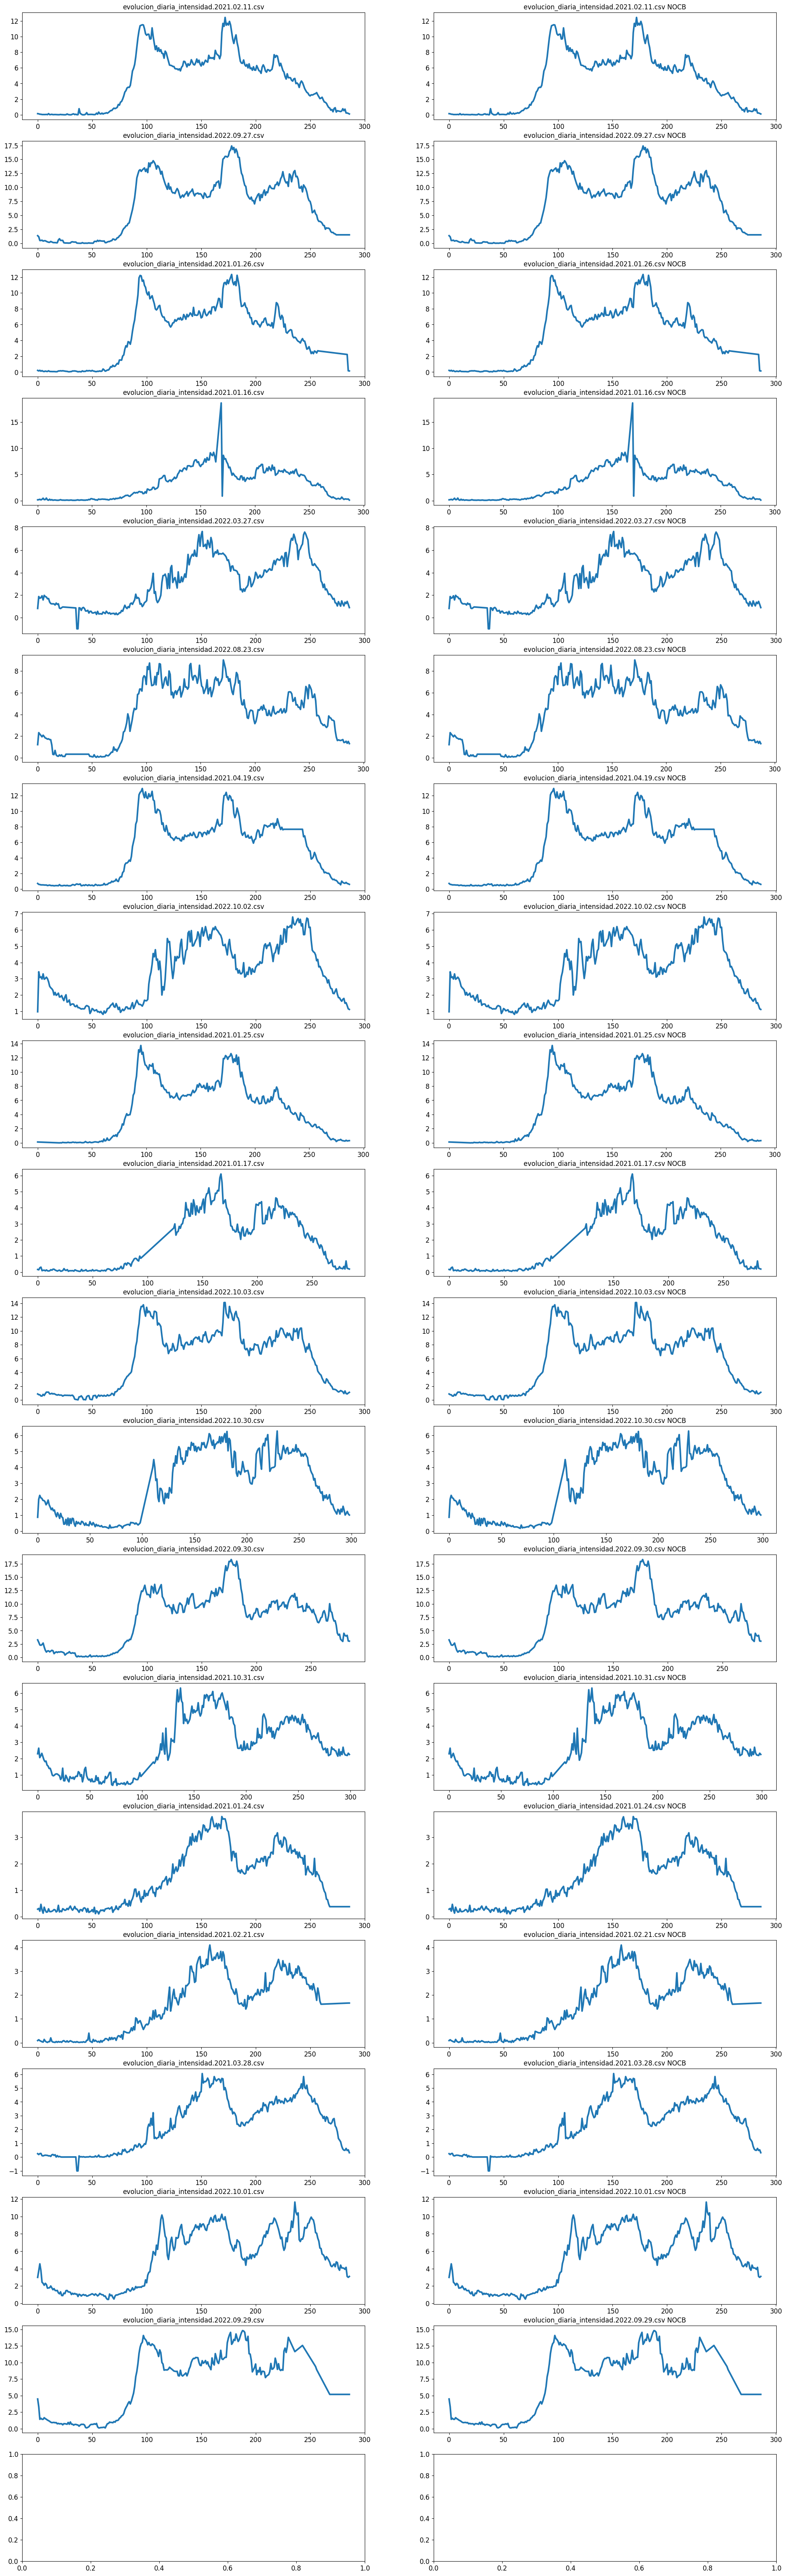

In [7]:
directory = './intensOcupation'
lista=['evolucion_diaria_intensidad.2021.02.11.csv', 'evolucion_diaria_intensidad.2022.09.27.csv', 'evolucion_diaria_intensidad.2021.01.26.csv', 'evolucion_diaria_intensidad.2021.01.16.csv', 'evolucion_diaria_intensidad.2022.03.27.csv', 'evolucion_diaria_intensidad.2022.08.23.csv', 'evolucion_diaria_intensidad.2021.04.19.csv', 'evolucion_diaria_intensidad.2022.10.02.csv', 'evolucion_diaria_intensidad.2021.01.25.csv', 'evolucion_diaria_intensidad.2021.01.17.csv', 'evolucion_diaria_intensidad.2022.10.03.csv', 'evolucion_diaria_intensidad.2022.10.30.csv', 'evolucion_diaria_intensidad.2022.09.30.csv', 'evolucion_diaria_intensidad.2021.10.31.csv', 'evolucion_diaria_intensidad.2021.01.24.csv', 'evolucion_diaria_intensidad.2021.02.21.csv', 'evolucion_diaria_intensidad.2021.03.28.csv', 'evolucion_diaria_intensidad.2022.10.01.csv', 'evolucion_diaria_intensidad.2022.09.29.csv']
fig, axs = plt.subplots(20,2,figsize=(25,85))


'''
for l in lista:
    df = pd.read_csv(directory+"/"+l)
    df = df.loc[:,["intensidad"]]

plt.plot(df, color='blue')
plt.show()
'''

for i in range(len(lista)):




    df = pd.read_csv(directory+"/"+lista[i])
    df = df.loc[:,["ocupacion"]]
    newdf=df.fillna(method ='ffill')




    axs[i, 0].plot(df,linewidth=3)
    axs[i, 1].plot(newdf,linewidth=3)

    axs[i, 0].set_title(lista[i])
    axs[i, 1].set_title(lista[i]+' NOCB')




plt.show()